In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap

In [4]:
train = pd.read_csv('~/data/project/300k.csv', low_memory=False)

In [5]:
train.head(10)

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9645139108510564000,9645139108711890000,9645139108443455000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9645139109852742000,9645139109785633000,9645139110590940000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,133
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9923201472785285000,9923201472986612000,9923201473791918000,9923201477013144000,9923201481308110000,...,False,False,False,False,False,False,False,False,False,16
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6093392705025474600,6093392705092583400,6093392705897889800,6093392702676664300,6093392715561566200,...,False,False,False,False,False,False,False,False,False,13
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6093392707709829100,6093392707776938000,6093392708045373400,6093392711266598900,6093392715561566200,...,False,False,False,False,False,False,False,False,False,133
5,21,-31.954980,115.853609,2016-09-08T03:55:58,MTA4NTIwMDE5MjEzOTQ0ODEzNDE=,3040698123425939500,3040698123224612900,3040698123493048300,3040698122419306500,3040698118124339200,...,False,False,False,False,False,False,False,False,False,21
6,66,-31.954245,115.852038,2016-09-08T03:55:25,NzMxNzg1MTY2MTI0NzQyNDU4OQ==,3040674303268880400,3040674303335989200,3040674303604424700,3040674302530682900,3040674306825650200,...,False,False,False,False,False,False,False,False,False,66
7,27,26.235257,-98.197591,2016-09-08T03:55:18,MTIzNDcyNjA3MDA4OTA2ODkwMDU=,9684323730997641000,9684323731198968000,9684323731467403000,9684323728246178000,9684323715361276000,...,False,False,False,False,False,False,False,False,False,27
8,35,20.525554,-97.458800,2016-09-08T03:55:01,MzcwMjg0NjQwNTA0MTk3MDkyNQ==,9645138740753990000,9645138740955316000,9645138741223752000,9645138740150010000,9645138735855043000,...,False,False,False,False,False,False,False,False,False,35
9,19,32.928558,-84.340278,2016-09-08T03:54:50,NzU5MDI0NzQ4NjYyNjIxMTIyOQ==,9868369829440782000,9868369829373673000,9868369829642109000,9868369828568367000,9868369832863334000,...,False,False,False,False,False,False,False,False,False,19


In [24]:
Names = pd.read_csv("../Data/pokemonNumbers.csv",header=None)
Names.columns = ['pokemonid', 'name']
Names['pokemonid'] = Names['pokemonid'].apply(lambda x: x-1)
Names.head()
dictionary = dict(zip(Names['pokemonid'], Names['name']))
dictionary

{0: 'Bulbasaur',
 1: 'Ivysaur',
 2: 'Venusaur',
 3: 'Charmander',
 4: 'Charmeleon',
 5: 'Charizard',
 6: 'Squirtle',
 7: 'Wartortle',
 8: 'Blastoise',
 9: 'Caterpie',
 10: 'Metapod',
 11: 'Butterfree',
 12: 'Weedle',
 13: 'Kakuna',
 14: 'Beedrill',
 15: 'Pidgey',
 16: 'Pidgeotto',
 17: 'Pidgeot',
 18: 'Rattata',
 19: 'Raticate',
 20: 'Spearow',
 21: 'Fearow',
 22: 'Ekans',
 23: 'Arbok',
 24: 'Pikachu',
 25: 'Raichu',
 26: 'Sandshrew',
 27: 'Sandslash',
 28: 'Nidoran F',
 29: 'Nidorina',
 30: 'Nidoqueen',
 31: 'Nidoran M',
 32: 'Nidorino',
 33: 'Nidoking',
 34: 'Clefairy',
 35: 'Clefable',
 36: 'Vulpix',
 37: 'Ninetales',
 38: 'Jigglypuff',
 39: 'Wigglytuff',
 40: 'Zubat',
 41: 'Golbat',
 42: 'Oddish',
 43: 'Gloom',
 44: 'Vileplume',
 45: 'Paras',
 46: 'Parasect',
 47: 'Venonat',
 48: 'Venomoth',
 49: 'Diglett',
 50: 'Dugtrio',
 51: 'Meowth',
 52: 'Persian',
 53: 'Psyduck',
 54: 'Golduck',
 55: 'Mankey',
 56: 'Primeape',
 57: 'Growlithe',
 58: 'Arcanine',
 59: 'Poliwag',
 60: 'Poliwhirl

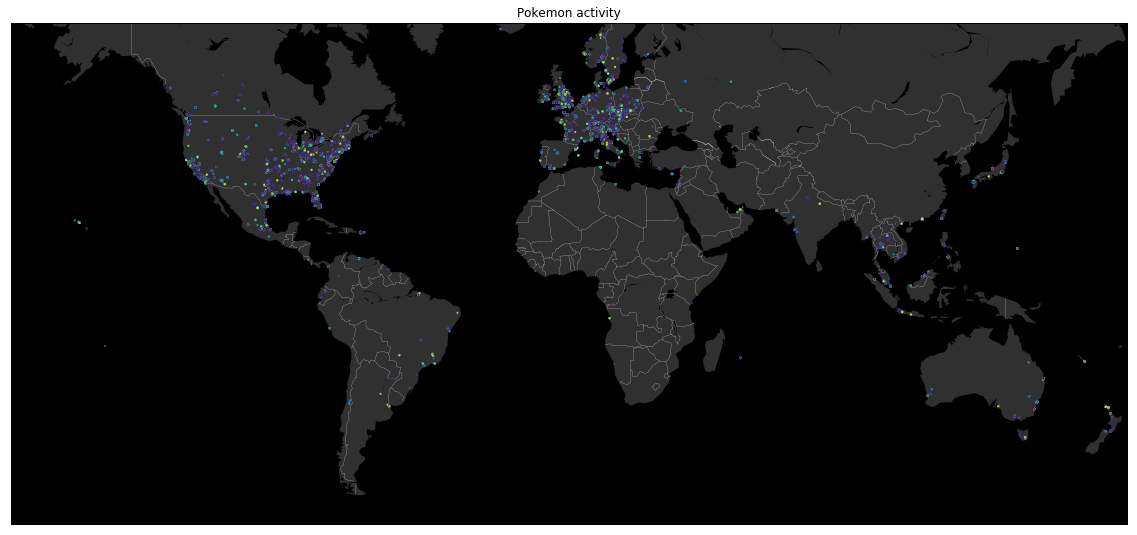

In [6]:
plt.figure(1, figsize=(20,10))
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')


m1.fillcontinents(color='#303030',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.2, color="w")              # thin white line for country borders
c = train['class'].tolist()
# Plot the data
x, y = m1(train.longitude.tolist(),train.latitude.tolist())
# m1.scatter(x,y, s=3, c=c, cmap=cm.get_cmap('hot'), lw=0, alpha=1, zorder=5)
m1.scatter(x,y, s=5, c=c, lw=0, alpha=1, zorder=5)
plt.title("Pokemon activity")
plt.savefig('../pic/Pokemon activity origin')
plt.show()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296021 entries, 0 to 296020
Columns: 208 entries, pokemonId to class
dtypes: bool(168), float64(7), int64(17), object(9), uint64(7)
memory usage: 137.8+ MB


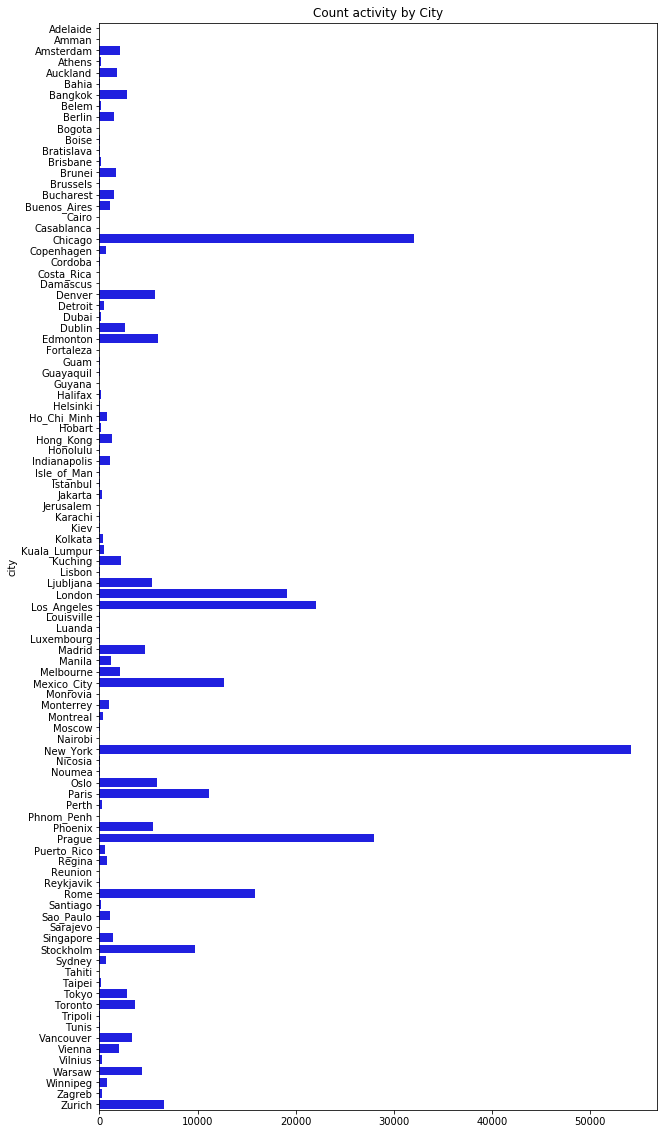

In [14]:
cnt = train.groupby('city')['city'].size()

f, ax = plt.subplots(figsize=(10, 20))
sns.barplot(x=cnt.values, y=cnt.index, color='b', ax=ax)
plt.setp(ax.patches, linewidth=0)
texts = ax.set(title="Count activity by City")

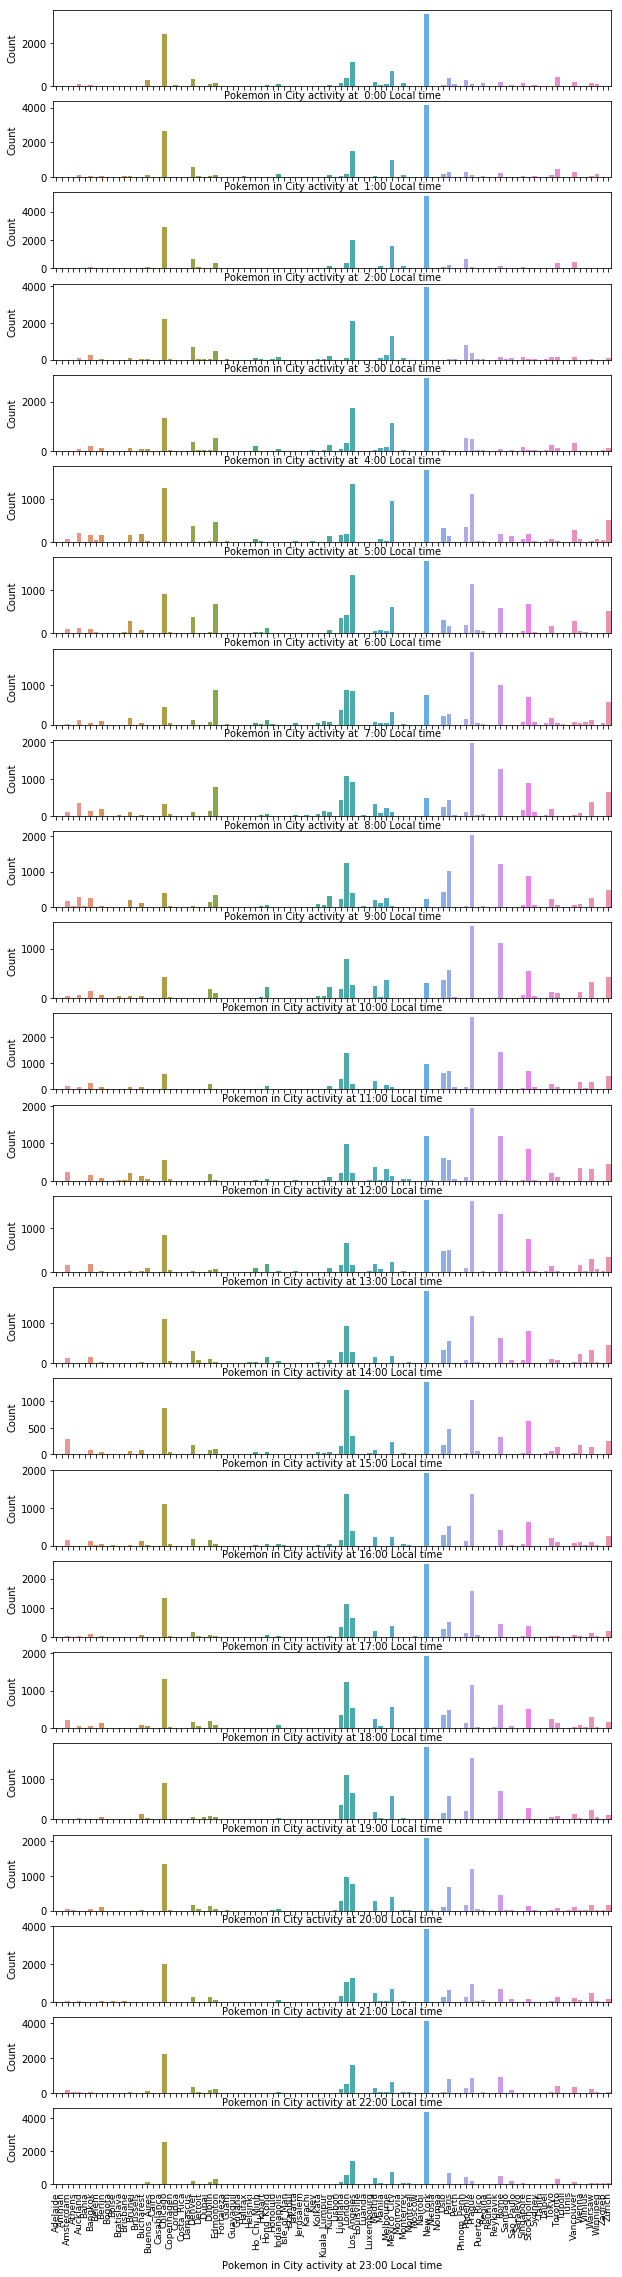

In [14]:
# extract feature local time
train['LocalTime'] = train.appearedLocalTime.apply(lambda x: x.split("T")[1])

# grouping data by time (hour)
loc_time = train.groupby(['city', train.LocalTime.map(lambda x: int(x.split(":")[0]))]).size()
loc_time = loc_time.unstack()
loc_time.fillna(0, inplace=True)

# plot grouping data
f, axes = plt.subplots(len(loc_time.columns), 1, figsize=(10, 40),sharex=True)
for i in range(len(loc_time.columns)):
	sns.barplot(x=loc_time.index, y=loc_time[i], ax=axes[i])
	axes[i].set(ylabel="Count", xlabel="Pokemon in City activity at %2d:00 Local time" %(i))
	plt.setp(axes[i].patches, linewidth=0)
	plt.setp(axes[i].get_xticklabels(), rotation=90, fontsize=9)
plt.savefig('../pic/pokemon in city at time')

## pokemen city

In [15]:
pokemon = train.groupby('pokemonId')['pokemonId'].size()
pokemon.head()

pokemonId
1    1368
2     100
3      12
4     738
5      23
Name: pokemonId, dtype: int64

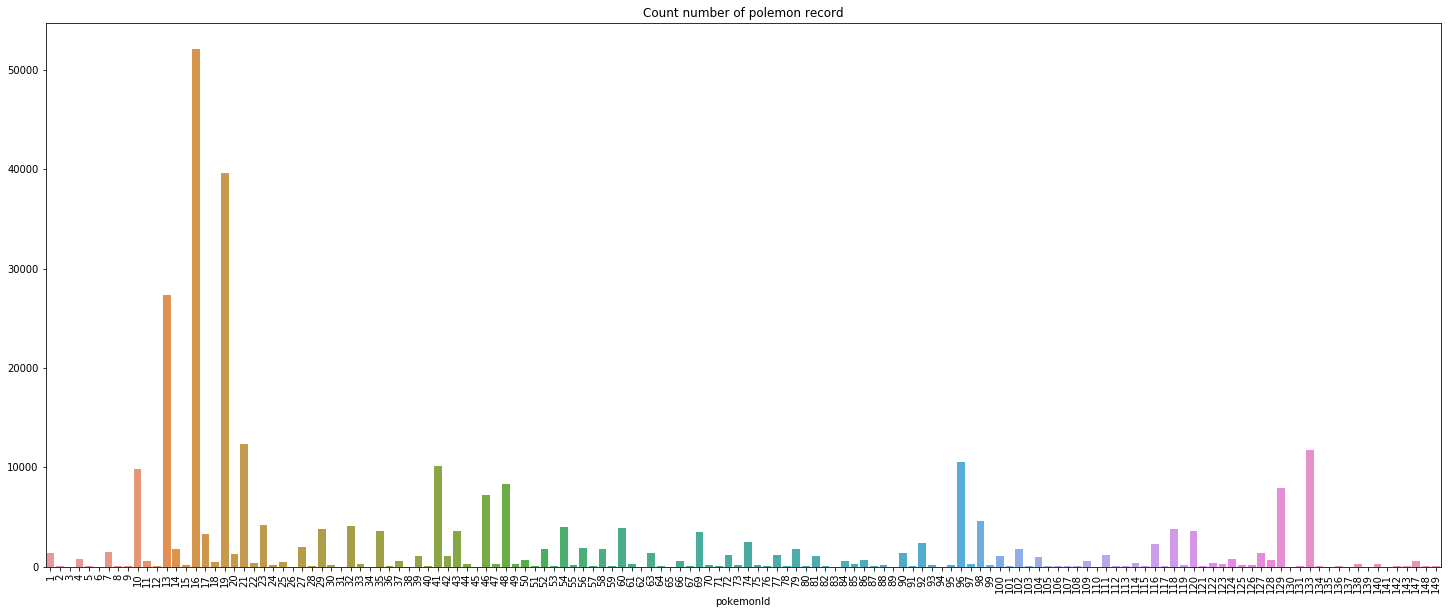

In [13]:
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x=pokemon.index, y=pokemon.values, ax=ax)
plt.setp(ax.patches, linewidth=0)
plt.xticks(rotation=90)
sns.set_palette("husl")
texts = ax.set(title="Count number of polemon record")
plt.savefig('Count number of polemon record')

In [16]:
poke_city = train.groupby(['city','pokemonId']).size()
poke_city = poke_city.unstack()
poke_city.fillna(0, inplace=True)
poke_city

pokemonId,1,2,3,4,5,6,7,8,9,10,...,137,138,139,140,141,142,143,147,148,149
city,,,,,,,,,,,,,,,,,,,,,
Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amman,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amsterdam,6.0,0.0,0.0,3.0,0.0,0.0,11.0,1.0,0.0,31.0,...,2.0,2.0,0.0,7.0,0.0,0.0,0.0,4.0,1.0,0.0
Athens,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Auckland,5.0,0.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0,76.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0
Bahia,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bangkok,47.0,7.0,0.0,21.0,0.0,1.0,25.0,4.0,0.0,109.0,...,0.0,2.0,0.0,0.0,0.0,0.0,2.0,9.0,1.0,0.0
Belem,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
Berlin,1.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,1.0,64.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0


In [17]:
poke_city.iloc[:,2]

city
Adelaide        0.0
Amman           0.0
Amsterdam       0.0
Athens          0.0
Auckland        0.0
Bahia           0.0
Bangkok         0.0
Belem           0.0
Berlin          0.0
Bogota          0.0
Boise           0.0
Bratislava      0.0
Brisbane        0.0
Brunei          0.0
Brussels        0.0
Bucharest       0.0
Buenos_Aires    0.0
Cairo           0.0
Casablanca      0.0
Chicago         3.0
Copenhagen      0.0
Cordoba         0.0
Costa_Rica      0.0
Damascus        0.0
Denver          0.0
Detroit         0.0
Dubai           0.0
Dublin          0.0
Edmonton        0.0
Fortaleza       0.0
               ... 
Oslo            0.0
Paris           0.0
Perth           0.0
Phnom_Penh      0.0
Phoenix         0.0
Prague          0.0
Puerto_Rico     0.0
Regina          0.0
Reunion         0.0
Reykjavik       0.0
Rome            2.0
Santiago        0.0
Sao_Paulo       0.0
Sarajevo        0.0
Singapore       0.0
Stockholm       1.0
Sydney          0.0
Tahiti          0.0
Taipei         

In [18]:
poke_city.columns

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            137, 138, 139, 140, 141, 142, 143, 147, 148, 149],
           dtype='int64', name='pokemonId', length=144)

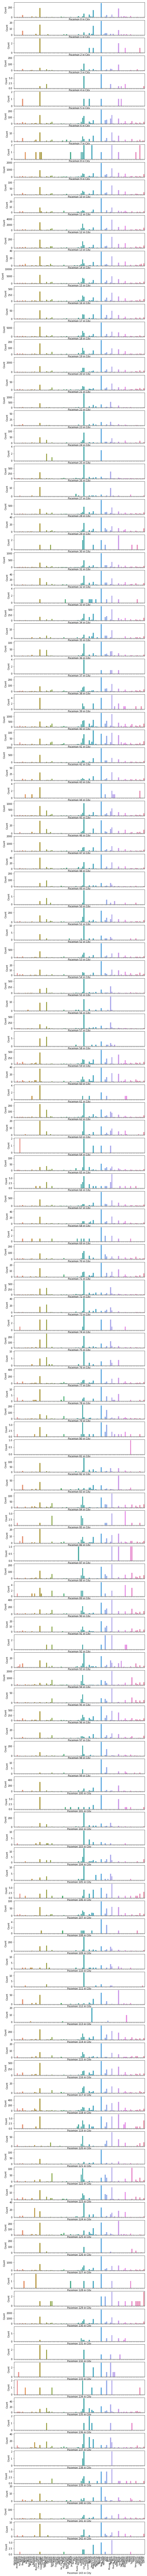

In [25]:
f, axes = plt.subplots(len(poke_city.columns), 1, figsize=(10, 200),sharex=True)
for i in range(len(poke_city.columns)):
	sns.barplot(x=poke_city.index, y=poke_city.iloc[:,i], ax=axes[i])
	axes[i].set(ylabel="Count", xlabel="Pocemon %d in City" %(i))
	plt.setp(axes[i].patches, linewidth=0)
	plt.setp(axes[i].get_xticklabels(), rotation=90, fontsize=9)
plt.savefig('pokemon in city')

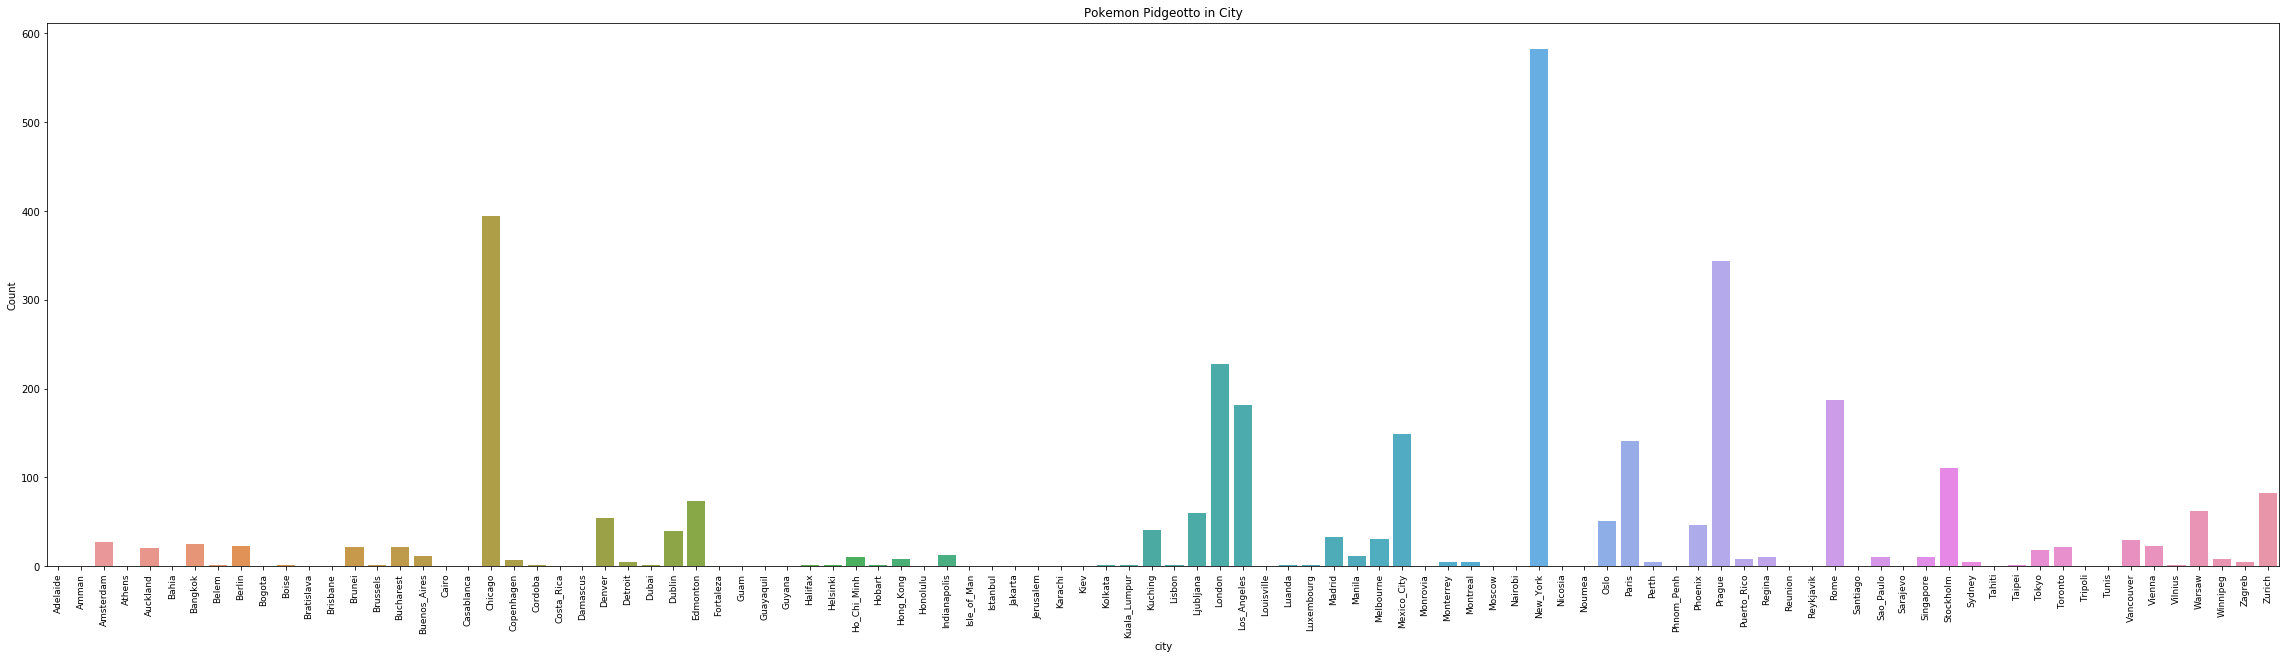

In [21]:
f, axes = plt.subplots(figsize=(40, 10),sharex=True)
sns.barplot(x=poke_city.index, y=poke_city.iloc[:,16], ax=axes)
axes.set(ylabel="Count", title="Pokemon %s in City" %(dictionary[16]))
plt.setp(axes.patches, linewidth=0)
plt.setp(axes.get_xticklabels(), rotation=90, fontsize=9)
plt.savefig('../pic/pokemon {} in city'.format(dictionary[16]))

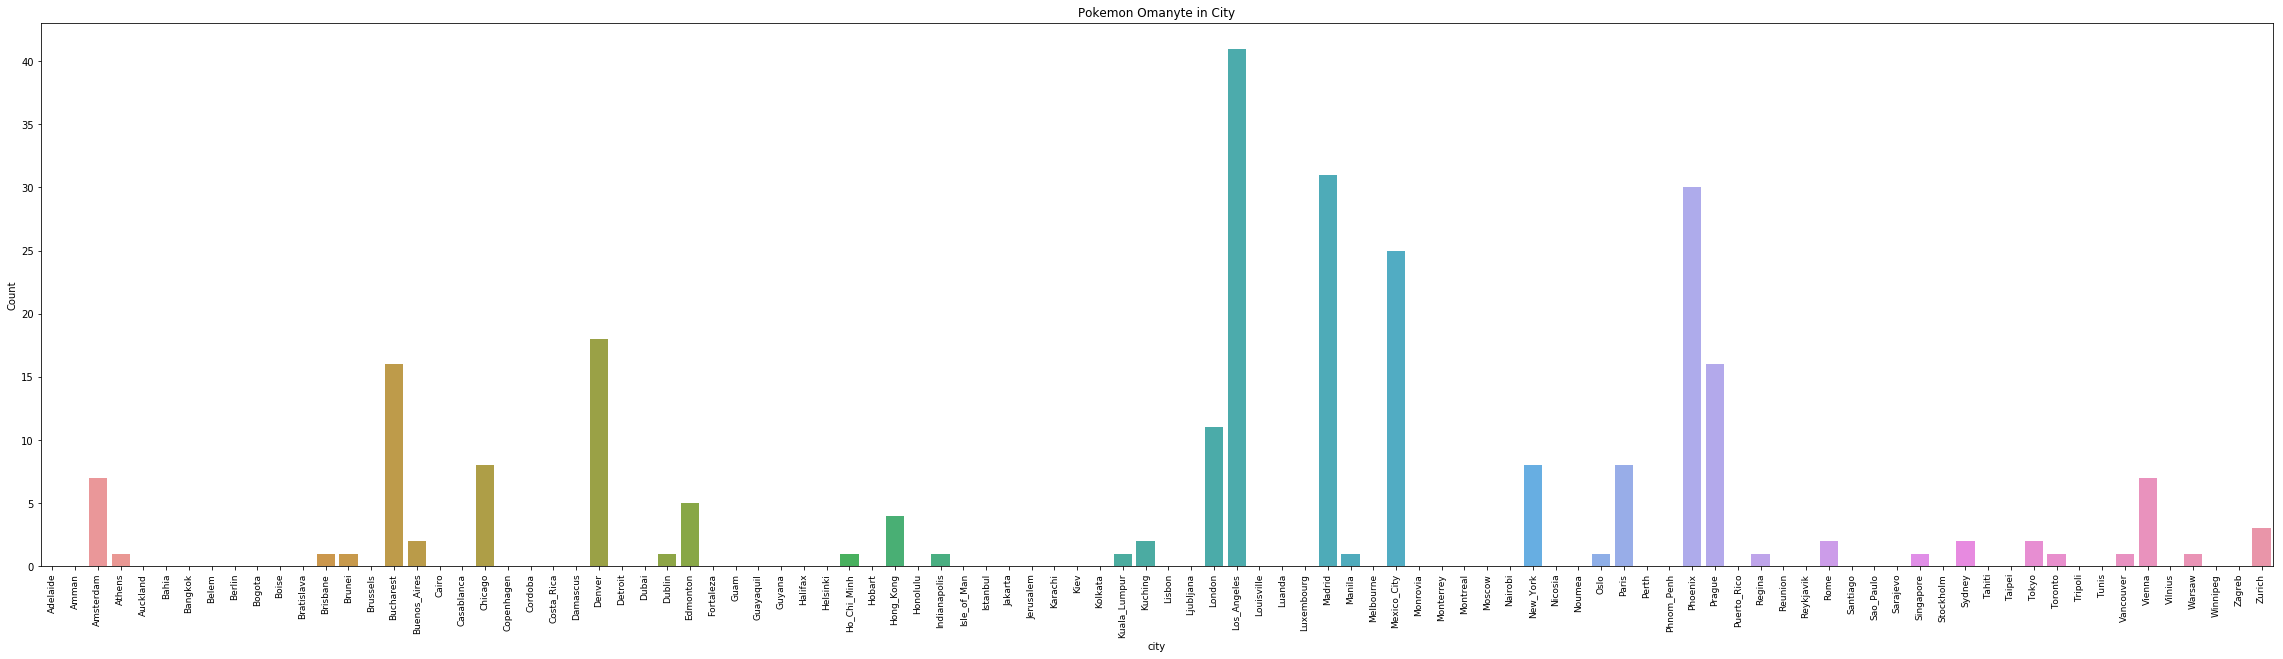

In [22]:
f, axes = plt.subplots(figsize=(40, 10),sharex=True)
sns.barplot(x=poke_city.index, y=poke_city.iloc[:,137], ax=axes)
axes.set(ylabel="Count", title="Pokemon %s in City" %(dictionary[137]))
plt.setp(axes.patches, linewidth=0)
plt.setp(axes.get_xticklabels(), rotation=90, fontsize=9)
plt.savefig('../pic/pokemon {} in city'.format(dictionary[137]))

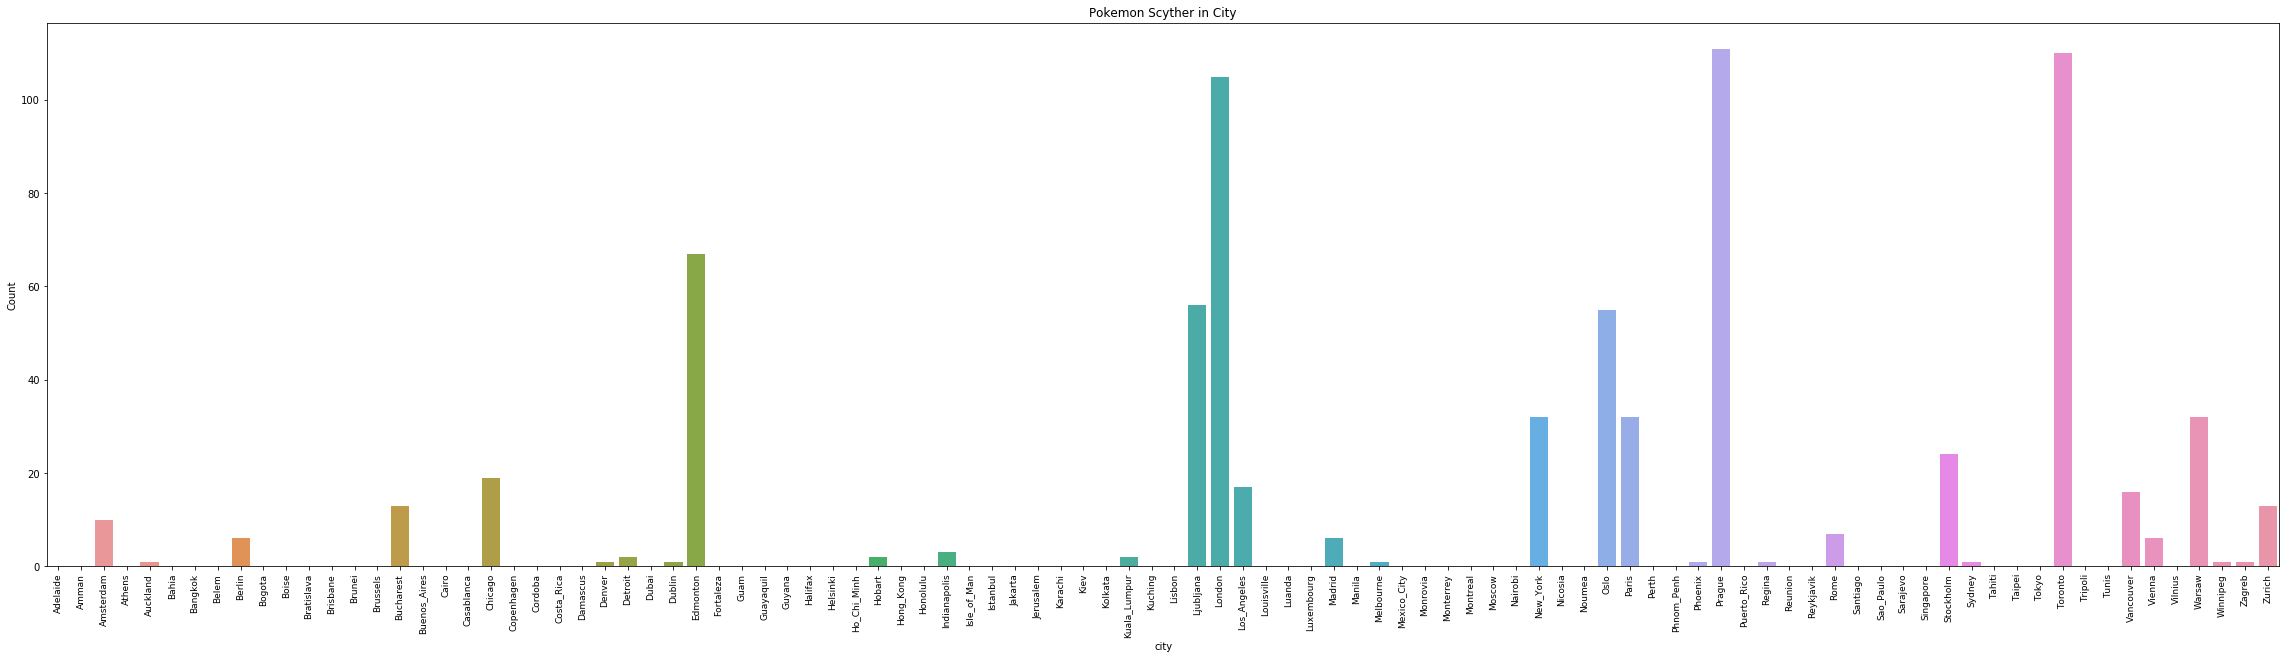

In [23]:
f, axes = plt.subplots(figsize=(40, 10),sharex=True)
sns.barplot(x=poke_city.index, y=poke_city.iloc[:,122], ax=axes)
axes.set(ylabel="Count", title="Pokemon %s in City" %(dictionary[122]))
plt.setp(axes.patches, linewidth=0)
plt.setp(axes.get_xticklabels(), rotation=90, fontsize=9)
plt.savefig('../pic/pokemon {} in city'.format(dictionary[122]))

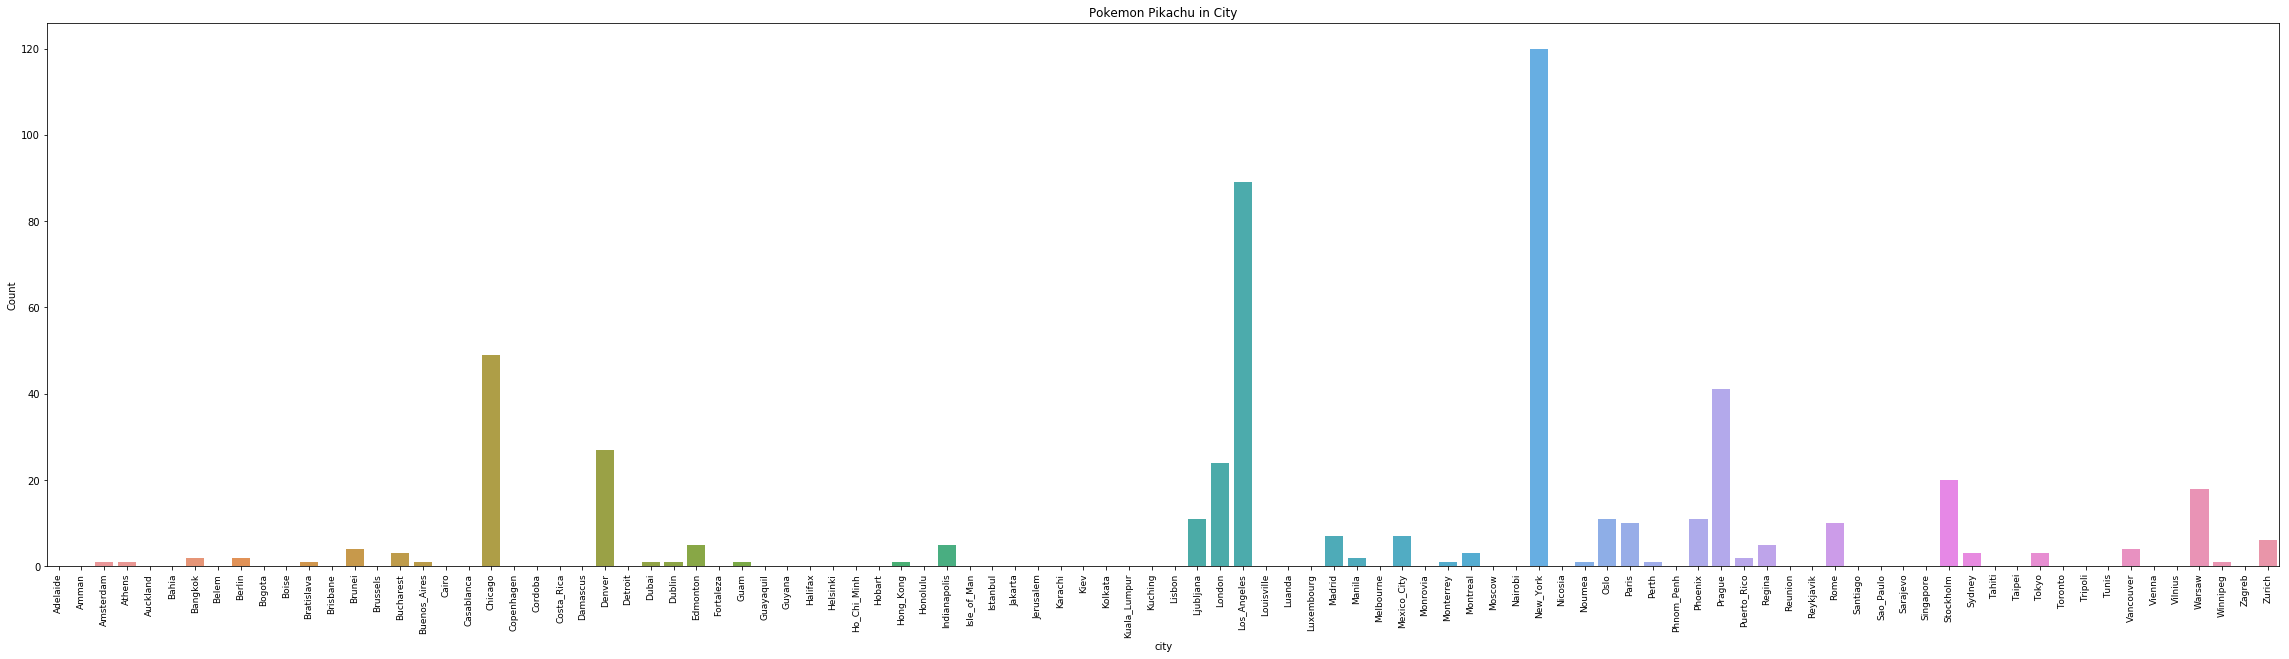

In [26]:
f, axes = plt.subplots(figsize=(40, 10),sharex=True)
sns.barplot(x=poke_city.index, y=poke_city.iloc[:,24], ax=axes)
axes.set(ylabel="Count", title="Pokemon %s in City" %(dictionary[24]))
plt.setp(axes.patches, linewidth=0)
plt.setp(axes.get_xticklabels(), rotation=90, fontsize=9)
plt.savefig('../pic/pokemon {} in city'.format(dictionary[24]))